In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

df = pd.read_csv("/kaggle/input/test-file/tested.csv")

In [2]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
# Calculate the average of non-null 'Age' values
average_age = df['Age'].mean()

# Replace null values with the rounded average
df['Age'] = df['Age'].fillna(round(average_age))

In [5]:
# Fill null values in the 'Cabin' column with "unknown"
df['Cabin'] = df['Cabin'].fillna("unknown")

In [6]:
df.dropna(inplace = True)

In [7]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,417.0,1100.635492,120.923774,892.00,996.0000,1101.0000,1205.0,1309.0000
Survived,417.0,0.364508,0.481870,0.00,0.0000,0.0000,1.0,1.0000
Pclass,417.0,2.263789,0.842077,1.00,1.0000,3.0000,3.0,3.0000
Age,417.0,30.143885,12.562546,0.17,23.0000,30.0000,35.0,76.0000
SibSp,417.0,0.448441,0.897568,0.00,0.0000,0.0000,1.0,8.0000
Parch,417.0,0.393285,0.982419,0.00,0.0000,0.0000,0.0,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


In [10]:
# Drop rows with zero values in the 'Fare' column
df = df[df['Fare'] != 0]

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,415.0,1100.103614,120.915275,892.0000,995.5000,1100.0000,1204.5,1309.0000
Survived,415.0,0.366265,0.482365,0.0000,0.0000,0.0000,1.0,1.0000
Pclass,415.0,2.269880,0.839504,1.0000,1.0000,3.0000,3.0,3.0000
Age,415.0,30.098795,12.558624,0.1700,23.0000,30.0000,35.0,76.0000
SibSp,415.0,0.450602,0.899191,0.0000,0.0000,0.0000,1.0,8.0000
Parch,415.0,0.395181,0.984408,0.0000,0.0000,0.0000,0.0,9.0000
Fare,415.0,35.798886,55.987458,3.1708,7.8958,14.4542,31.5,512.3292


----------
## Data Cleaning Done!
- Changed every Null value in the "Age" column with the Average age
- Changed every Null value in the "Cabin" column with "unkown" cause a 327 rows had null values
- Droped 1 Null value in the "Fare" column
- Droped any 0 value in the "Fare" column cause no one can enter the ship without a Ticket
- No Duplicates
- No Outliers
---------

------------------
# Average of Fare by Class and Gender

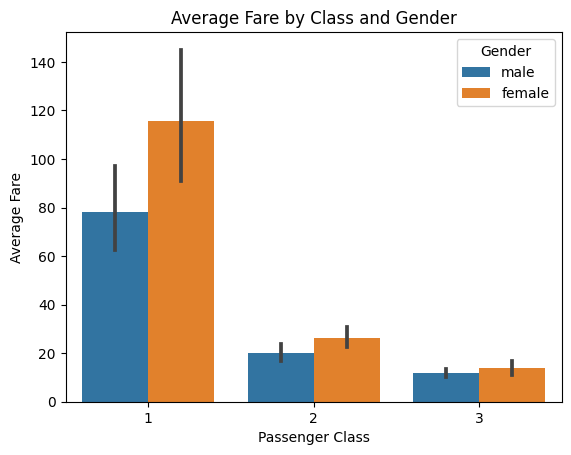

In [12]:
sns.barplot(x='Pclass', y='Fare', hue='Sex', data=df)
plt.title('Average Fare by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.legend(title='Gender')
plt.show()

- 1 stands for "First Class"
- 2 stands for "Second Class"
- 3 stands for "Third Class"

-----------------
# Survivors and Not Survived by Location Embarked

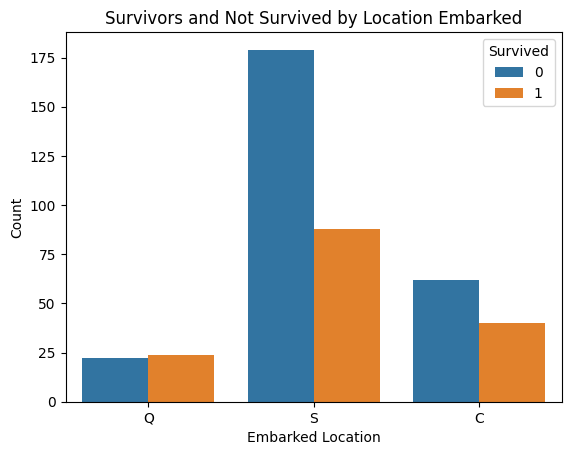

In [13]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survivors and Not Survived by Location Embarked')
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

- 0 in "Survived" Stands for "Dead"
- 1 in "Survived" Stands for "Alive"
- Q in "Embarked Location" Stands for "Queenstown"
- C in "Embarked Location" Stands for "Cherbourg"
- S in "Embarked Location" Stands for "Southampton"

---------------
# Total Survivors by Gender and Class

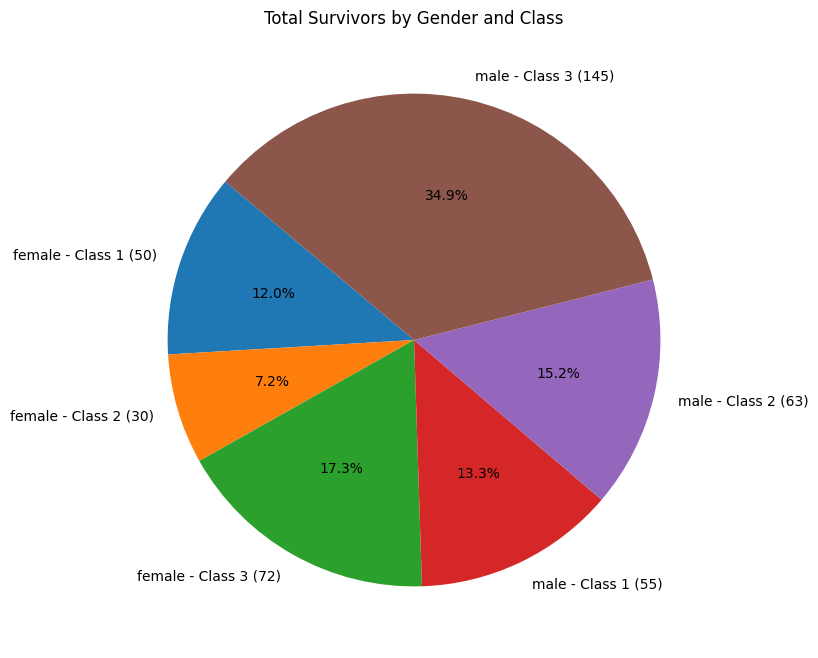

In [14]:
# Filter the DataFrame for survivors only
survivors = df[df['Survived'] == 1 & (df['Sex'] == 'female')]

# Group by gender and class, count the survivors
survivor_counts = survivors.groupby(['Sex', 'Pclass']).size().reset_index(name='Count')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(survivor_counts['Count'], labels=survivor_counts.apply(lambda x: f"{x['Sex']} - Class {x['Pclass']} ({x['Count']})", axis=1), autopct='%1.1f%%', startangle=140)
plt.title('Total Survivors by Gender and Class')
plt.show()

-------------
# Distribution of Passenger Ages


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


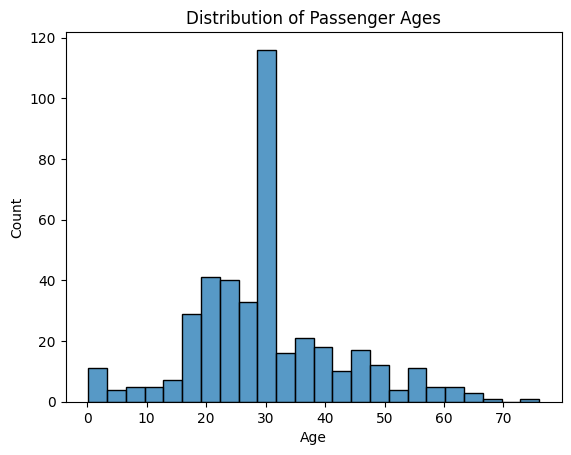

In [15]:
sns.histplot(df['Age'])
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()